In [1]:
from pyspark.sql import SparkSession
import pandas as pd 

spark = SparkSession.builder.getOrCreate()

# Read CSV file
csv_df = spark.read.csv("raw_data/FW_Fish_Individual_Lengths.csv", header=True, inferSchema=True, multiLine=True)

csv_df.write.mode("overwrite").parquet("working_data/FW_Fish_Individual_Lengths.parquet")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/07/05 13:09:13 WARN Utils: Your hostname, codespaces-6557a2, resolves to a loopback address: 127.0.0.1; using 10.0.0.203 instead (on interface eth0)
25/07/05 13:09:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/05 13:09:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# Read the Parquet file
df = spark.read.parquet("working_data/FW_Fish_Individual_Lengths.parquet")

df.printSchema()
df.show(5)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/07/05 15:44:55 WARN Utils: Your hostname, codespaces-6557a2, resolves to a loopback address: 127.0.0.1; using 10.0.0.254 instead (on interface eth0)
25/07/05 15:44:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/05 15:44:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- SURVEY_ID: integer (nullable = true)
 |-- SURVEY_SPECIES_ID: integer (nullable = true)
 |-- SPECIES_ID: integer (nullable = true)
 |-- SPECIES_RUN_ID: integer (nullable = true)
 |-- RUN_NUMBER: integer (nullable = true)
 |-- LW_MEASURED_ID: integer (nullable = true)
 |-- FISH_LENGTH: integer (nullable = true)
 |-- FISH_WEIGHT: double (nullable = true)
 |-- AGE_BAND: string (nullable = true)
 |-- NALL_AGE: string (nullable = true)



+---------+-----------------+----------+--------------+----------+--------------+-----------+-----------+--------+--------+
|SURVEY_ID|SURVEY_SPECIES_ID|SPECIES_ID|SPECIES_RUN_ID|RUN_NUMBER|LW_MEASURED_ID|FISH_LENGTH|FISH_WEIGHT|AGE_BAND|NALL_AGE|
+---------+-----------------+----------+--------------+----------+--------------+-----------+-----------+--------+--------+
|   176011|           758857|       111|       1007731|         2|       9498746|        134|       NULL|      >0|    NULL|
|   176011|           758857|       111|       1007731|         2|       9498747|        135|       NULL|      >0|    NULL|
|   176011|           758857|       111|       1007731|         2|       9498748|        137|       NULL|      >0|    NULL|
|   176011|           758857|       111|       1007730|         1|       9498712|        235|       NULL|      >0|    NULL|
|   176011|           758857|       111|       1007730|         1|       9498716|        263|       NULL|      >0|    NULL|
+-------

In [3]:
import os

csv_path = "raw_data/FW_Fish_Individual_Lengths.csv"
parquet_dir = "working_data/FW_Fish_Individual_Lengths.parquet"

# Get CSV file size
csv_size = os.path.getsize(csv_path)

# Get Parquet directory total size
parquet_size = 0
for dirpath, dirnames, filenames in os.walk(parquet_dir):
    for f in filenames:
        fp = os.path.join(dirpath, f)
        parquet_size += os.path.getsize(fp)

print(f"CSV file size: {csv_size / 1024:.2f} KB")
print(f"Parquet file size: {parquet_size / 1024:.2f} KB")
print(f"Parquet file size is {parquet_size / csv_size * 100 :.2f}% of CSV file size")

CSV file size: 302376.03 KB
Parquet file size: 48593.09 KB
Parquet file size is 16.07% of CSV file size


In [3]:
df.describe().show()

25/07/05 13:49:28 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+
|summary|         SURVEY_ID| SURVEY_SPECIES_ID|        SPECIES_ID|    SPECIES_RUN_ID|        RUN_NUMBER|    LW_MEASURED_ID|       FISH_LENGTH|      FISH_WEIGHT|          AGE_BAND|          NALL_AGE|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+
|  count|           7367578|           7367578|           7367578|           7367578|           7367578|           7367578|           7367578|           240058|           1130971|             23866|
|   mean| 93682.65089680761|361486.63287636725|186.76893668448437|456139.34172627697|1.2403370551353512| 4823066.600317092|121.35132888990113|294.6411737996638|2.3283536234110374|2.1630705394190812|
| std

In [5]:
df.summary().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+
|summary|         SURVEY_ID| SURVEY_SPECIES_ID|        SPECIES_ID|    SPECIES_RUN_ID|        RUN_NUMBER|    LW_MEASURED_ID|       FISH_LENGTH|      FISH_WEIGHT|          AGE_BAND|          NALL_AGE|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+
|  count|           7367578|           7367578|           7367578|           7367578|           7367578|           7367578|           7367578|           240058|           1130971|             23866|
|   mean| 93682.65089680761|361486.63287636725|186.76893668448437|456139.34172627697|1.2403370551353512| 4823066.600317092|121.35132888990113|294.6411737996638|2.3283536234110374|2.1630705394190812|
| std

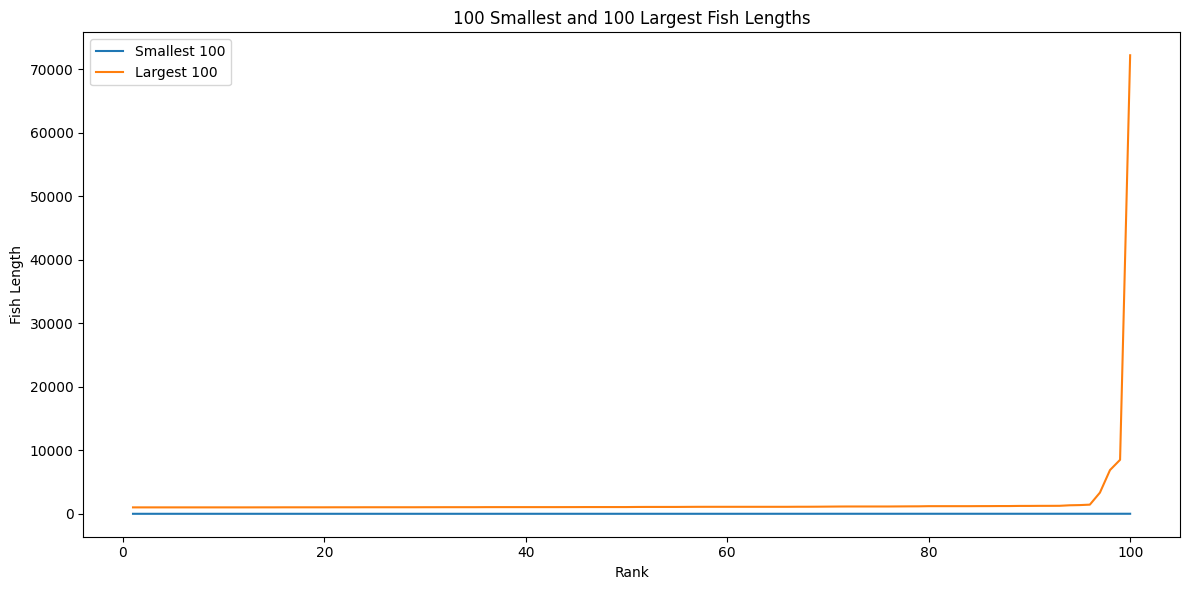

In [4]:
import matplotlib.pyplot as plt

length_col = "FISH_LENGTH"

# Get 100 smallest fish lengths
smallest_100_sdf = df.orderBy(length_col).select(length_col).limit(100)
smallest_100_pd = smallest_100_sdf.toPandas()

# Get 100 largest fish lengths
largest_100_sdf = df.orderBy(df[length_col].desc()).select(length_col).limit(100)
largest_100_pd = largest_100_sdf.toPandas().sort_values(by=length_col)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 101), smallest_100_pd[length_col].values, label="Smallest 100")
plt.plot(range(1, 101), largest_100_pd[length_col].values, label="Largest 100")
plt.xlabel("Rank")
plt.ylabel("Fish Length")
plt.title("100 Smallest and 100 Largest Fish Lengths")
plt.legend()
plt.tight_layout()
plt.show()

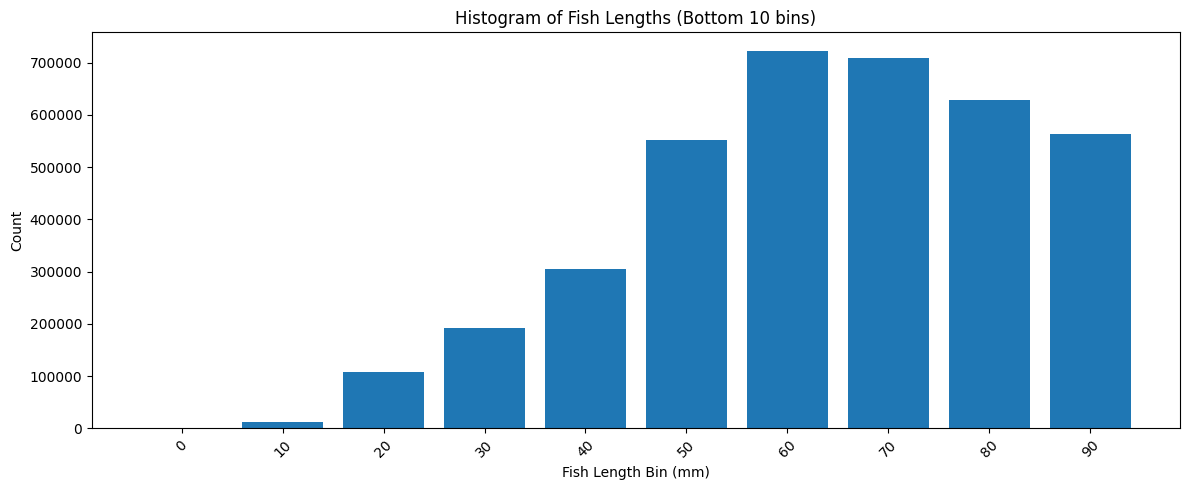

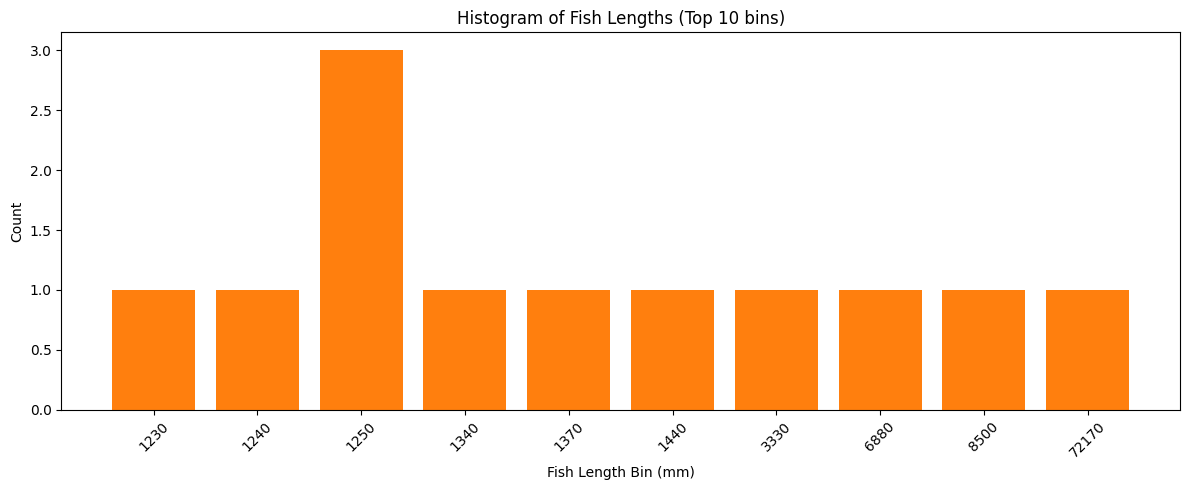

In [ ]:
import matplotlib.pyplot as plt

# Compute histogram bins and counts using PySpark
bin_width = 10
min_length = df.agg({"FISH_LENGTH": "min"}).collect()[0][0]
max_length = df.agg({"FISH_LENGTH": "max"}).collect()[0][0]
bins = list(range((min_length // bin_width) * bin_width, ((max_length // bin_width) + 2) * bin_width, bin_width))

# Assign bin to each row
import pyspark.sql.functions as F

df_hist = df.withColumn(
    "length_bin",
    ((F.col("FISH_LENGTH") / bin_width).cast("int") * bin_width)
)

# Group by bin and count
hist_counts = (
    df_hist.groupBy("length_bin")
    .count()
    .orderBy("length_bin")
    .toPandas()
)

# Show only bottom 10 and top 10 bins
bottom_10 = hist_counts.head(10)
top_10 = hist_counts.tail(10)


plt.figure(figsize=(12, 5))
plt.bar(bottom_10["length_bin"].astype(str), bottom_10["count"], color='tab:blue')
plt.xlabel("Fish Length Bin (mm)")
plt.ylabel("Count")
plt.title("Histogram of Fish Lengths (Bottom 10 bins)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(top_10["length_bin"].astype(str), top_10["count"], color='tab:orange')
plt.xlabel("Fish Length Bin (mm)")
plt.ylabel("Count")
plt.title("Histogram of Fish Lengths (Top 10 bins)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Total count in histogram: 7367501


Total rows in DataFrame: 7367501
Validation passed: All values are accounted for in the histogram.


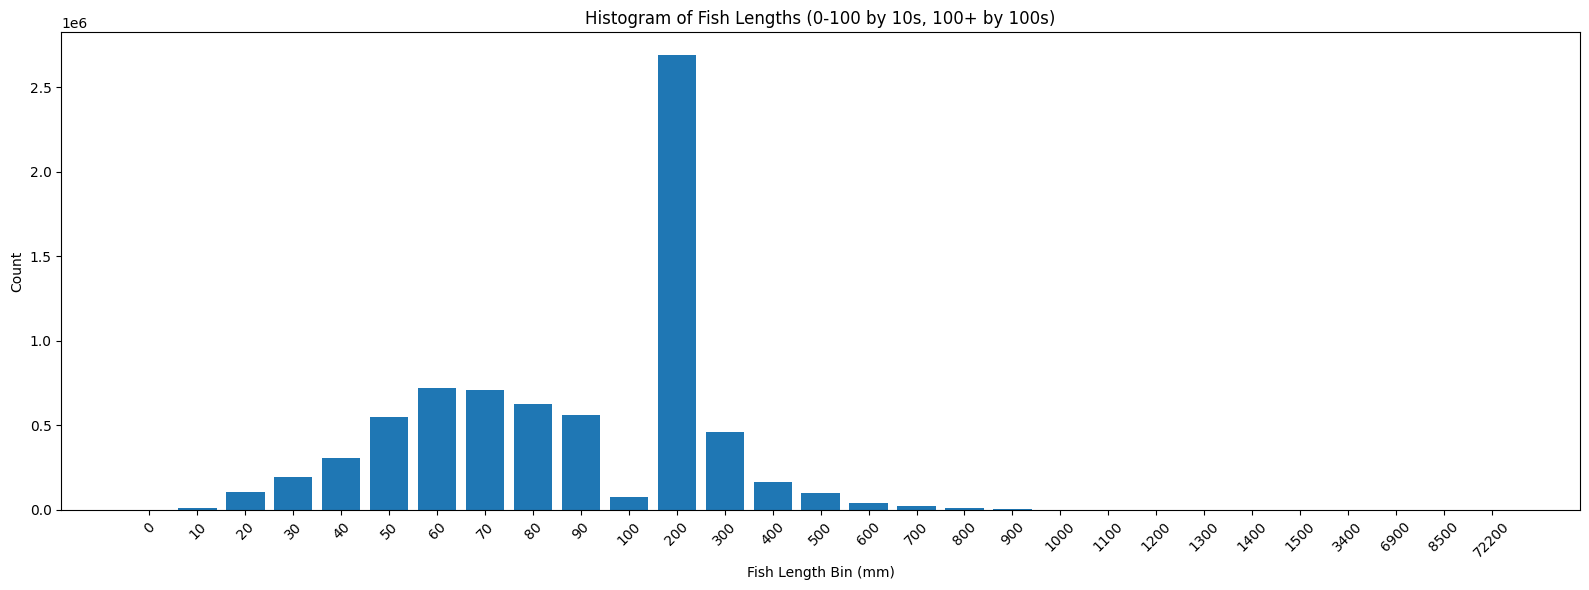

In [23]:
import matplotlib.pyplot as plt

# Define custom bins: width of 10 for 0-100, then width of 100 for 100+
bin_edges = list(range(0, 101, 10))
if max_length > 100:
    bin_edges += list(range(200, ((max_length // 100) + 2) * 100, 100))
bins = bin_edges

# Assign bin to each row
import pyspark.sql.functions as F

def custom_bin(length):
    if length <= 100:
        return (length // 10) * 10
    else:
        return ((length - 1) // 100) * 100 + 100

custom_bin_udf = F.udf(custom_bin, "int")

df_hist_custom = df.withColumn(
    "length_bin",
    custom_bin_udf(F.col("FISH_LENGTH"))
)

# Group by bin and count
hist_counts_custom = (
    df_hist_custom.groupBy("length_bin")
    .count()
    .orderBy("length_bin")
    .toPandas()
)

total_hist_count = hist_counts_custom["count"].sum()
print(f"Total count in histogram: {total_hist_count}")

# Optionally, compare to the total number of rows in your DataFrame
total_df_count = df.count()
print(f"Total rows in DataFrame: {total_df_count}")

if total_hist_count == total_df_count:
    print("Validation passed: All values are accounted for in the histogram.")
else:
    print("Validation failed: Counts do not match.")

plt.figure(figsize=(16, 6))
plt.bar(hist_counts_custom["length_bin"].astype(str), hist_counts_custom["count"], color='tab:blue')
plt.xlabel("Fish Length Bin (mm)")
plt.ylabel("Count")
plt.title("Histogram of Fish Lengths (0-100 by 10s, 100+ by 100s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


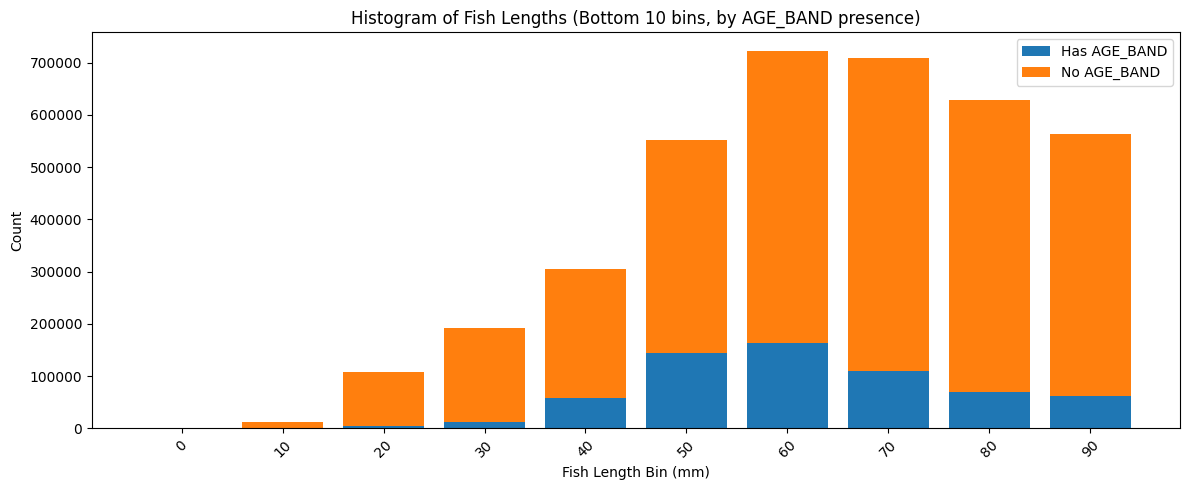

In [18]:
# Group by length_bin and AGE_BAND null status
age_band_counts = (
    df_hist
    .withColumn("has_age_band", F.when(F.col("AGE_BAND").isNull(), "No AGE_BAND").otherwise("Has AGE_BAND"))
    .groupBy("length_bin", "has_age_band")
    .count()
    .orderBy("length_bin")
    .toPandas()
)

# Pivot for plotting
pivot = age_band_counts.pivot(index="length_bin", columns="has_age_band", values="count").fillna(0)
bottom_10_bins = bottom_10["length_bin"].values
pivot = pivot.loc[bottom_10_bins]

# Plot stacked bar
plt.figure(figsize=(12, 5))
plt.bar(pivot.index.astype(str), pivot["Has AGE_BAND"], label="Has AGE_BAND", color='tab:blue')
plt.bar(pivot.index.astype(str), pivot["No AGE_BAND"], bottom=pivot["Has AGE_BAND"], label="No AGE_BAND", color='tab:orange')
plt.xlabel("Fish Length Bin (mm)")
plt.ylabel("Count")
plt.title("Histogram of Fish Lengths (Bottom 10 bins, by AGE_BAND presence)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Find the 10 smallest fish with a non-null AGE_BAND
smallest_with_age_band = (
    df.filter(df.AGE_BAND.isNotNull())
    .orderBy(length_col)
    .select(length_col, "AGE_BAND")
    .limit(10)
    .toPandas()
)
smallest_with_age_band

,FISH_LENGTH,AGE_BAND
0,5,0
1,5,0
2,5,0
3,5,1+
4,6,0
5,6,0
6,7,0+
7,7,0+
8,7,0
9,7,1+


In [26]:
df = df.filter((df.FISH_LENGTH >= 5) & (df.FISH_LENGTH <= 2000))

In [6]:
# Get unique SPECIES_ID with matched SPECIES_NAME and LATIN_NAME from counts_df
unique_species_list = (
    counts_df.select("SPECIES_ID", "SPECIES_NAME", "LATIN_NAME")
    .dropDuplicates(["SPECIES_ID"])
    .orderBy("SPECIES_ID")
    .collect()
)

# Convert to a list of dicts
species_info_list = [
    {
        "SPECIES_ID": row["SPECIES_ID"],
        "SPECIES_NAME": row["SPECIES_NAME"],
        "LATIN_NAME": row["LATIN_NAME"]
    }
    for row in unique_species_list
]

species_info_list[:5]  # Show first 5 as a sample

[{'SPECIES_ID': None, 'SPECIES_NAME': None, 'LATIN_NAME': None},
 {'SPECIES_ID': 1, 'SPECIES_NAME': 'All species', 'LATIN_NAME': None},
 {'SPECIES_ID': 103, 'SPECIES_NAME': 'Salmonid species', 'LATIN_NAME': None},
 {'SPECIES_ID': 111,
  'SPECIES_NAME': 'Brown / sea trout',
  'LATIN_NAME': 'Salmo trutta'},
 {'SPECIES_ID': 114,
  'SPECIES_NAME': 'Rainbow trout',
  'LATIN_NAME': 'Oncorhynchus mykiss'}]

In [7]:
# Get unique SURVEY_ID and corresponding EVENT_DATE_YEAR from counts_df
unique_survey_list = (
    counts_df.select("SURVEY_ID", "EVENT_DATE_YEAR")
    .dropDuplicates(["SURVEY_ID"])
    .orderBy("SURVEY_ID")
    .collect()
)

# Convert to a list of dicts
survey_info_list = [
    {
        "SURVEY_ID": row["SURVEY_ID"],
        "EVENT_DATE_YEAR": row["EVENT_DATE_YEAR"]
    }
    for row in unique_survey_list
]

survey_info_list[:5]  # Show first 5 as a sample

[{'SURVEY_ID': 120, 'EVENT_DATE_YEAR': 2000},
 {'SURVEY_ID': 140, 'EVENT_DATE_YEAR': 2001},
 {'SURVEY_ID': 160, 'EVENT_DATE_YEAR': 2001},
 {'SURVEY_ID': 4001, 'EVENT_DATE_YEAR': 1987},
 {'SURVEY_ID': 4002, 'EVENT_DATE_YEAR': 1987}]

In [8]:
import pandas as pd
import pyspark.sql.functions as F
from pyspark.sql.types import StringType
import re

# 1. Create DataFrames from the lists
survey_info_pd = pd.DataFrame(survey_info_list)
species_info_pd = pd.DataFrame(species_info_list)

survey_info_sdf = spark.createDataFrame(survey_info_pd)
species_info_sdf = spark.createDataFrame(species_info_pd)

# 2. Add EVENT_DATE_YEAR by matching SURVEY_ID
df_joined = df.join(survey_info_sdf, on="SURVEY_ID", how="left")

# 3. Add SPECIES_NAME and LATIN_NAME by matching SPECIES_ID
df_joined = df_joined.join(species_info_sdf, on="SPECIES_ID", how="left")

# 4. Aggregation for all years
agg_all = (
    df_joined.groupBy("SPECIES_ID")
    .agg(
        F.count("*").alias("species_count"),
        F.count(F.col("AGE_BAND")).alias("age_band_count"),
        F.collect_list("AGE_BAND").alias("age_band_list")
    )
)

# Helper to get unique AGE_BAND values with counts as a string
def format_age_band_counts(age_band_list):
    from collections import Counter
    counts = Counter([v for v in age_band_list if v is not None and str(v).strip() != ""])
    return ", ".join(f"{k} ({v})" for k, v in sorted(counts.items(), key=lambda x: x[0]))

format_age_band_counts_udf = F.udf(format_age_band_counts, returnType=StringType())

agg_all = agg_all.withColumn(
    "unique_AGE_BAND_values",
    format_age_band_counts_udf("age_band_list")
).drop("age_band_list")

# 5. Aggregation for EVENT_DATE_YEAR >= 2005
agg_2005 = (
    df_joined.filter(F.col("EVENT_DATE_YEAR") >= 2005)
    .groupBy("SPECIES_ID")
    .agg(
        F.count("*").alias("species_count_2005plus"),
        F.count(F.col("AGE_BAND")).alias("age_band_count_2005plus"),
        F.collect_list("AGE_BAND").alias("age_band_list_2005plus")
    )
)

agg_2005 = agg_2005.withColumn(
    "unique_AGE_BAND_values_2005plus",
    format_age_band_counts_udf("age_band_list_2005plus")
).drop("age_band_list_2005plus")

# 6. Join both aggregations
final_df = agg_all.join(
    agg_2005.select(
        "SPECIES_ID",
        "species_count_2005plus",
        "age_band_count_2005plus",
        "unique_AGE_BAND_values_2005plus"
    ),
    on="SPECIES_ID",
    how="outer"
)

# 7. Now join species info ONCE
final_df = final_df.join(species_info_sdf, on="SPECIES_ID", how="left")

# 8. Sort by age_band_count descending
final_df = final_df.orderBy(F.desc("age_band_count"))

# 9. Set column order
final_df = final_df.select(*column_order)

final_df.show(truncate=False)

# 10. Convert to pandas and sort unique AGE_BAND values for CSV
def sort_key(val):
    val = val.strip()
    match = re.match(r'([<>]?)(\d+)(\+?)', val)
    if not match:
        return (2, 0, '')  # Put unrecognized at the end
    sign, num, plus = match.groups()
    sign_order = {'<': 0, '': 1, '>': 2}
    return (sign_order.get(sign, 1), int(num), plus)

def sort_age_band_string(s):
    if pd.isnull(s):
        return ""
    items = [v.strip() for v in s.split(",") if v.strip()]
    return ", ".join(sorted(items, key=lambda x: sort_key(x.split(" ")[0])))

result_pd = final_df.toPandas()
result_pd["unique_AGE_BAND_values"] = result_pd["unique_AGE_BAND_values"].apply(sort_age_band_string)
result_pd["unique_AGE_BAND_values_2005plus"] = result_pd["unique_AGE_BAND_values_2005plus"].apply(sort_age_band_string)

result_pd.to_csv("outputs/species_aggregates.csv", index=False)


+----------+-----------------+---------------------------+-------------+--------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+-----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
# Check if all fish are accounted for
total_fish_in_parquet = df.count()
if result_pd["species_count"].sum() == total_fish_in_parquet:
    print("All fish are accounted for in species_count.")
else:
    print(f"Discrepancy in species_count: {result_pd['species_count'].sum()} vs {total_fish_in_parquet}")

# Check if all age_band entries are accounted for
total_age_band_in_parquet = df.filter(df.AGE_BAND.isNotNull()).count()
if result_pd["age_band_count"].sum() == total_age_band_in_parquet:
    print("All age_band entries are accounted for in age_band_count.")
else:
    print(f"Discrepancy in age_band_count: {result_pd['age_band_count'].sum()} vs {total_age_band_in_parquet}")

All fish are accounted for in species_count.
All age_band entries are accounted for in age_band_count.
